<a href="https://colab.research.google.com/github/tsakailab/iip/blob/main/sandbox/convolution_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# data

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/17/RYB_Color_wheel.png/320px-RYB_Color_wheel.png)

--2021-11-17 06:24:41--  https://upload.wikimedia.org/wikipedia/commons/thumb/1/17/RYB_Color_wheel.png/320px-RYB_Color_wheel.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16019 (16K) [image/png]
Saving to: ‘target_img.tif’

target_img.tif      100%[===================>]  15.64K  --.-KB/s    in 0.003s  

2021-11-17 06:24:41 (4.61 MB/s) - ‘target_img.tif’ saved [16019/16019]



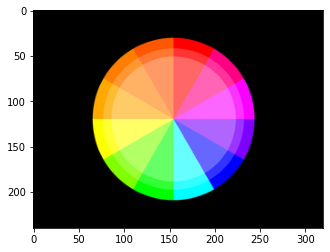

In [ ]:
# In[1]: Donwload target image
# i use lena_std.tif (in http://www.lenna.org) as sample image.
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

!wget https://upload.wikimedia.org/wikipedia/commons/thumb/1/17/RYB_Color_wheel.png/320px-RYB_Color_wheel.png -O target_img.tif
lena = Image.open("target_img.tif")
lena = lena.convert('RGB')
lena = np.array(lena)
plt.imshow(lena,cmap='gray')

lena = torch.tensor(lena).permute(2, 0, 1)

# convolution 2d

## kernel setting

In [ ]:
import torch

kernel_0 = [[0, 0, 0],
            [0, 0, 0],
            [0, 0, 0]]
# kernel_0 = [[0]]
kernel_0 = torch.tensor(kernel_0)

kernel_1 = [[-1, -1, -1],
            [-1,  8, -1],
            [-1, -1, -1]]
# kernel_1 = [[1]]
kernel_1 = torch.tensor(kernel_1)

kernel_2 = [[-1, -1, -1],
            [-1,  8, -1],
            [-1, -1, -1]]
# kernel_2 = [[0]]
kernel_2 = torch.tensor(kernel_2)


In [ ]:
kernel = torch.cat((kernel_0.unsqueeze(0), kernel_1.unsqueeze(0), kernel_2.unsqueeze(0)), 0)
print(kernel.shape)
print(kernel)

torch.Size([3, 3, 3])
tensor([[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[-1, -1, -1],
         [-1,  8, -1],
         [-1, -1, -1]],

        [[-1, -1, -1],
         [-1,  8, -1],
         [-1, -1, -1]]])


In [ ]:
conv = torch.nn.Conv2d(3, 1, 3, bias=False, padding=1)
print(conv.weight.shape)
conv.weight = torch.nn.Parameter(kernel.unsqueeze(0).float())
print(conv.weight.shape)

torch.Size([1, 3, 3, 3])
torch.Size([1, 3, 3, 3])


In [ ]:
lena_after = conv(lena.unsqueeze(0).float())

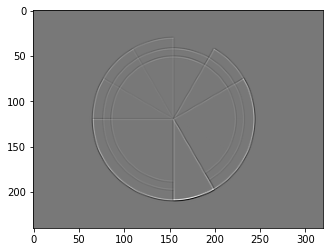

In [ ]:
plt.imshow(lena_after[0, 0].detach(), cmap='gray')